In [1]:
# Let's start by opening and reading a small part of the file to understand its structure
file_path = 'All mail Including Spam and Trash.mbox'

# Read the first part of the file to understand its structure
with open(file_path, 'r', encoding='utf-8') as file:
    content_preview = file.read(1024)  # Read the first 1024 characters for a preview

content_preview

'From 1789661171270937312@xxx Thu Feb 01 02:18:14 +0000 2024\nX-GM-THRID: 1789661171270937312\nX-Gmail-Labels: Spam,Category Promotions,Unread\nDelivered-To: jengabuilding90@gmail.com\nReceived: by 2002:a05:7300:d027:b0:106:2596:8029 with SMTP id ni39csp150111dyb;\n        Wed, 31 Jan 2024 18:18:14 -0800 (PST)\nX-Received: by 2002:a81:bb52:0:b0:5fb:c044:f087 with SMTP id a18-20020a81bb52000000b005fbc044f087mr3234127ywl.35.1706753894003;\n        Wed, 31 Jan 2024 18:18:14 -0800 (PST)\nARC-Seal: i=2; a=rsa-sha256; t=1706753893; cv=pass;\n        d=google.com; s=arc-20160816;\n        b=rYXtUHzzPuhbR+c1ilMXjQs+Dzc40gDBgVQS+V9o8HTS7hBOTdJzGwkkBOE+pUbcz8\n         YyVlAwzN93X/GtBNbIjgjMHhvnWHpwLkBTnH14a58PYfHplSi68/NAg2CUck9t+1jPgH\n         ZVGz9TB88im8rAXhGCKml/Bxo/evkJAFRhMh2BCMjPnJ9RQlKsw3WmLkhrd3jCL3FYo1\n         kIPPE0MCRMZ/v4uaPnWyqNOOv5HMXFHOTCu1UDhTDfPvQ+zMVhYwJvuB/wvdqjqQzURJ\n         4w7TaBCKvuYxRzzZAs2BMcvxLfcafFYB+bzKKr8Ysf8dFDILVGE9+QonEvxn2Li+6Una\n         MZ8g==\nARC-Mess

In [3]:
import mailbox
import json

# Function to extract key details from an email message
def extract_email_details(msg):
    details = {
        "from": msg.get('From', ''),
        "delivered_to": msg.get('Delivered-To', ''),
        "subject": msg.get('Subject', ''),
        "date": msg.get('Date', ''),
        "labels": msg.get('X-Gmail-Labels', '')
    }
    return details

# Load the mbox file
mbox = mailbox.mbox(file_path)

# Extract details from each email in the mbox file
emails = [extract_email_details(msg) for msg in mbox]

# Convert the list of email details to JSON format
emails_json = json.dumps(emails, indent=4)

# Due to potential size, preview the first email in JSON format instead of printing everything
emails_json_preview = json.dumps(emails[:1], indent=4)

# Save the full JSON data to a file
json_file_path = 'emails_extracted.json'
with open(json_file_path, 'w', encoding='utf-8') as json_file:
    json_file.write(emails_json)

json_file_path, emails_json_preview


('emails_extracted.json',
 '[\n    {\n        "from": "\\"Jacky\\" <info@action.rosenfornevada.com>",\n        "delivered_to": "jengabuilding90@gmail.com",\n        "subject": "just got word",\n        "date": "Thu, 01 Feb 2024 02:18:09 +0000",\n        "labels": "Spam,Category Promotions,Unread"\n    }\n]')

In [21]:
# Re-import necessary libraries and redefine the function after code execution state was reset
import mailbox
import json
all_content = ""
# Redefine function to include email content (both plain text and HTML if available)
def extract_email_content_and_details(msg):
    global all_content
    details = {
        "from": msg.get('From', ''),
        "delivered_to": msg.get('Delivered-To', ''),
        "subject": msg.get('Subject', ''),
        "date": msg.get('Date', ''),
        "labels": msg.get('X-Gmail-Labels', '')
    }
    
    details["content_plain"] = ""
    details["content_html"] = ""
    
    if msg.is_multipart():
        for part in msg.walk():
            content_type = part.get_content_type()
            content_disposition = part.get("Content-Disposition")
            
            if content_disposition:  # Ignore attachments/html images
                continue
            if content_type == "text/plain":
                details["content_plain"] = part.get_payload(decode=True).decode('utf-8', errors='ignore')
            elif content_type == "text/html":
                details["content_html"] = part.get_payload(decode=True).decode('utf-8', errors='ignore')
    else:
        content_type = msg.get_content_type()
        if content_type == "text/plain":
            details["content_plain"] = msg.get_payload(decode=True).decode('utf-8', errors='ignore')
        elif content_type == "text/html":
            details["content_html"] = msg.get_payload(decode=True).decode('utf-8', errors='ignore')
    # print(details["content_plain"])
    all_content += details["content_plain"]
    all_content += "\n"
    return details, details["content_plain"]

# Load the mbox file again
file_path = 'All mail Including Spam and Trash.mbox'
mbox = mailbox.mbox(file_path)

# Process a limited number of emails to demonstrate inclusion of content
limited_emails_all = [extract_email_content_and_details(msg) for msg in list(mbox)[:5]]

limited_emails = limited_emails_all[0]
content_plain = limited_emails_all[1]
# Convert to JSON format
limited_emails_json = json.dumps(limited_emails, indent=4)

# Save the JSON data to a file (limited set)
limited_json_file_path = 'limited_emails_extracted.json'
with open(limited_json_file_path, 'w', encoding='utf-8') as json_file:
    json_file.write(limited_emails_json)

limited_json_file_path, json.dumps(limited_emails[:1], indent=4)  # Preview the first email with content in JSON format

# print(content_plain[0]["content_plain"])
print(type(content_plain[0]))
print(all_content)
print(content_plain[0].keys())

<class 'dict'>
It's been a long day, friend, so I'll jump right in: If Democrats lose in Nevada, we will lose our Senate majority. Full stop.

That's why hitting our fundraising goals – and having the resources to defeat the GOP – is so critical. But unfortunately, I just got word from my team that we're still $5,274 short of our end-of-month goal with just 3 hours left until the midnight deadline. 

So please, this is the last call: Will you chip in $5 – even $25 – right now to keep Nevada and the Senate blue?

https://secure.actblue.com/contribute/page/rosenfornevada_email_january_2024?refcode=jtk3392-fr-text&amounts=5,25,50,100,250

Thank you,

Jacky



--------

This email was sent to Jengabuiling90@gmail.com.

To unsubscribe from this email list, please click here: https://act.rosenfornevada.com/p/lu4OBSNc3UKuSuNlvLb3Zg2?unsubscribedata=aY8wPzFtQiGX%2FddI4ofDRERu7c4uxY%2FsSaJz2eo93JtYnwSPOJij1vE8SSNO5TUxSDEVsrlS0oROoPAH2mnGNWBifIA2IxXCI6QOZ4o5yVlVlx3f75J%2BEo0dEO6yDL0Ow70wTa%2Bwg1

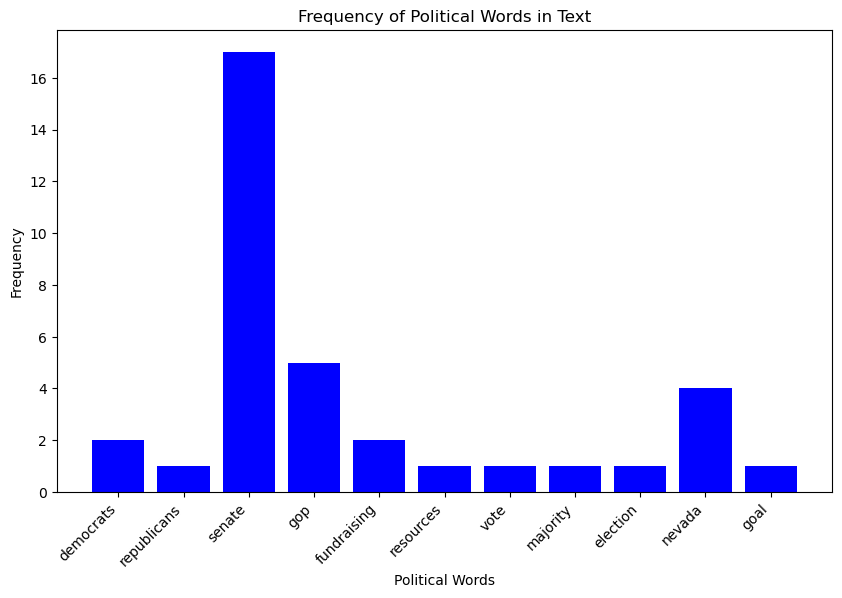

In [22]:
political_words = [
    "democrats", "republicans", "senate", "gop", "fundraising", "resources", "vote",
    "majority", "election", "nevada", "deadline", "goal"
]

# Load the provided text to scan for these words
text_path = "/Users/maomao/Desktop/untitled 4.txt"
with open(text_path, 'r') as file:
    text = file.read().lower()  # Convert text to lowercase to match case-insensitively

# Tokenize the text and count the frequency of each political word
from collections import Counter
word_counts = Counter(text.split())
political_word_frequencies = {word: word_counts[word] for word in political_words if word in word_counts}

import matplotlib.pyplot as plt

# Extract words and their frequencies for plotting
words = list(political_word_frequencies.keys())
frequencies = list(political_word_frequencies.values())

plt.figure(figsize=(10, 6))
plt.bar(words, frequencies, color='blue')
plt.xlabel('Political Words')
plt.ylabel('Frequency')
plt.title('Frequency of Political Words in Text')
plt.xticks(rotation=45, ha="right")
plt.show()
